In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

### statisitcs with uncertainties for charge changing with geometric corrections

In [2]:
def stat_errors_charge(filename_cc,geo_corr_file,target_thickness,adding):
    targettype = None
    factor = None
    n_t = None
    delta_n_t = None
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    if (target_thickness == "thin"):
        targettype = "c_54"
        factor = (1./T_54)*(pow(10,27))
        n_t = T_54
        delta_n_t = 0.000648
    if (target_thickness == "medium"):
        targettype = "c_1086"
        n_t = T_1086
        delta_n_t = 0.002620
        factor = (1./T_1086)*(pow(10,27))
    if (target_thickness == "thick"):
        targettype = "c_2198"
        n_t = T_2198
        delta_n_t = 0.000322
        factor = (1./T_2198)*(pow(10,27))
        
    ##data frame for charge changing
    df_cc = pd.read_csv(filename_cc,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
    df_cc["d_carbon_survived"] = df_cc["survived_ions"]/df_cc["incoming ions"]
    ##data frame for geo correction
    df_geo = pd.read_csv(geo_corr_file,sep='\t',names=["datatype","targettype","RunID","energy","geo_corr_factor"])
    ### this step of doing the inverse is just needed for twim eff numbers!! DANGEROUS!
    df_geo["geo_corr_factor"] = 1./df_geo["geo_corr_factor"]

    cc_error_val = []
    cc_cs = []
    cc_cs_geo = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        #charge changing cross section
        dz = (float(df_cc.loc[(df_cc["targettype"] == targettype) & (df_cc["energy"] == float(ene))]['d_carbon_survived']))/(float(df_cc.loc[(df_cc["targettype"] == "empty") & (df_cc["energy"] == float(ene))]['d_carbon_survived']))
        cc = factor*(-math.log(dz))
        cc_cs.append(cc)
        #geo corr cross section
        d_geo = float(df_geo.loc[(df_geo["targettype"] == targettype)& (df_geo["energy"] == float(ene))]["geo_corr_factor"])/float(df_geo.loc[(df_geo["targettype"] == "empty")& (df_geo["energy"] == float(ene))]["geo_corr_factor"])
        cs_geo = factor*(-math.log(d_geo))
        if (adding =="true"):
            cc_cs_geo.append(cc+cs_geo) 
            print("hellooo")
        if (adding == "false"):
            cc_cs_geo.append(cc)
            print("not hello")

        ##now doing the stat. uncertainty calculations
        
        ### target thickness uncertainty
        target_error = pow(cc*delta_n_t,2)

        ### charge changing uncertainties
        r_cc_target = float(df_cc.loc[(df_cc["targettype"] == targettype) & (df_cc["energy"] == float(ene))]['d_carbon_survived'])
        r_cc_empty = float(df_cc.loc[(df_cc["targettype"] == "empty") & (df_cc["energy"] == float(ene))]['d_carbon_survived'])
        n_i_t_cc = float(df_cc.loc[(df_cc["targettype"] == targettype) & (df_cc["energy"] == float(ene))]['incoming ions'])
        n_i_e_cc = float(df_cc.loc[(df_cc["targettype"] == "empty") & (df_cc["energy"] == float(ene))]['incoming ions'])
        cc_error = (pow(10,54))*(1./(n_t*n_t))*((1-r_cc_target)/(r_cc_target*n_i_t_cc)+(1-r_cc_empty)/(r_cc_empty*n_i_e_cc))
        cc_error_val.append(math.sqrt(target_error+cc_error))

    return cc_cs_geo,cc_error_val

### here I use as geometric correction the twim efficiency factor
---

In [3]:
filename_cc = 'numbers/comb_gauss2d_border.txt'
filename_geo_corr = "total_eff_twim.txt"

cc_cs_geo_thin,cc_geo_error_thin = stat_errors_charge(filename_cc,filename_geo_corr,"thin",'true')
cc_cs_geo_medium,cc_geo_error_medium = stat_errors_charge(filename_cc,filename_geo_corr,"medium",'true')
cc_cs_geo_thick,cc_geo_error_thick = stat_errors_charge(filename_cc,filename_geo_corr,"thick",'true')


cc_cs_geo_thin_f,cc_geo_error_thin_f = stat_errors_charge(filename_cc,filename_geo_corr,"thin",'false')
cc_cs_geo_medium_f,cc_geo_error_medium_f = stat_errors_charge(filename_cc,filename_geo_corr,"medium",'false')
cc_cs_geo_thick_f,cc_geo_error_thick_f = stat_errors_charge(filename_cc,filename_geo_corr,"thick",'false')


hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello


/tmp/ipykernel_43709/1590743472.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz = (float(df_cc.loc[(df_cc["targettype"] == targettype) & (df_cc["energy"] == float(ene))]['d_carbon_survived']))/(float(df_cc.loc[(df_cc["targettype"] == "empty") & (df_cc["energy"] == float(ene))]['d_carbon_survived']))
/tmp/ipykernel_43709/1590743472.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_geo = float(df_geo.loc[(df_geo["targettype"] == targettype)& (df_geo["energy"] == float(ene))]["geo_corr_factor"])/float(df_geo.loc[(df_geo["targettype"] == "empty")& (df_geo["energy"] == float(ene))]["geo_corr_factor"])
/tmp/ipykernel_43709/1590743472.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r

/tmp/ipykernel_43709/255221130.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(energy,cc_cs_geo_thick,yerr=cc_geo_error_thick,label="thick target",color='red',marker="o",fmt="o")
/tmp/ipykernel_43709/255221130.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(energy,cc_cs_geo_medium,yerr=cc_geo_error_medium,label="medium target",color='green',marker="v",fmt="o")
/tmp/ipykernel_43709/255221130.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(energy,cc_cs_geo_thin,yerr=cc_geo_error_thin,label="thin target",color='blue',marker="s",fmt="o")
/tmp/ipykernel_43709/255221130.py:14: UserWarning: marker is redun

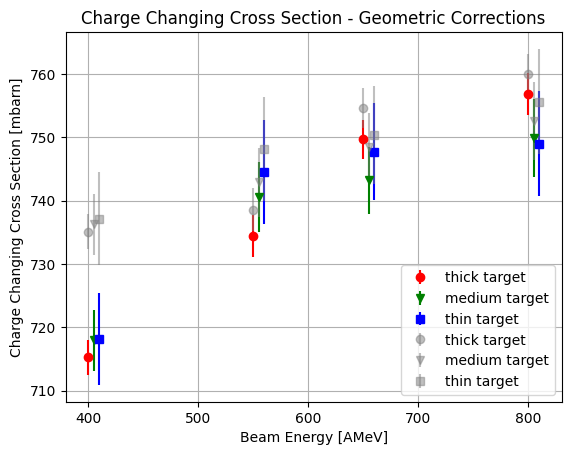

In [4]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,cc_cs_geo_thick,yerr=cc_geo_error_thick,label="thick target",color='red',marker="o",fmt="o")

energy = [405,555,655,805]
ax.errorbar(energy,cc_cs_geo_medium,yerr=cc_geo_error_medium,label="medium target",color='green',marker="v",fmt="o")

energy = [410,560,660,810]
ax.errorbar(energy,cc_cs_geo_thin,yerr=cc_geo_error_thin,label="thin target",color='blue',marker="s",fmt="o")

## whithout geo correction , in gray
energy = [400,550,650,800]
ax.errorbar(energy,cc_cs_geo_thick_f,yerr=cc_geo_error_thick_f,label="thick target",color='gray',marker="o",fmt="o",alpha=0.5)

energy = [405,555,655,805]
ax.errorbar(energy,cc_cs_geo_medium_f,yerr=cc_geo_error_medium_f,label="medium target",color='gray',marker="v",fmt="o",alpha=0.5)

energy = [410,560,660,810]
ax.errorbar(energy,cc_cs_geo_thin_f,yerr=cc_geo_error_thin_f,label="thin target",color='gray',marker="s",fmt="o",alpha=0.5)

ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Charge Changing Cross Section [mbarn]")
ax.set_title("Charge Changing Cross Section - Geometric Corrections")
#ax.set_ylim(740,890)
plt.savefig("charge_changing_cross_sec_twim_eff_corr.png")

---

### here I use as geo correction the real geo cuts...
---

In [5]:
filename_cc = 'numbers/comb_gauss2d_border.txt'
filename_geo_corr = "orig_geo_corr_factor.txt"

cc_cs_geo_thin,cc_geo_error_thin = stat_errors_charge(filename_cc,filename_geo_corr,"thin",'true')
cc_cs_geo_medium,cc_geo_error_medium = stat_errors_charge(filename_cc,filename_geo_corr,"medium",'true')
cc_cs_geo_thick,cc_geo_error_thick = stat_errors_charge(filename_cc,filename_geo_corr,"thick",'true')


cc_cs_geo_thin_f,cc_geo_error_thin_f = stat_errors_charge(filename_cc,filename_geo_corr,"thin",'false')
cc_cs_geo_medium_f,cc_geo_error_medium_f = stat_errors_charge(filename_cc,filename_geo_corr,"medium",'false')
cc_cs_geo_thick_f,cc_geo_error_thick_f = stat_errors_charge(filename_cc,filename_geo_corr,"thick",'false')

hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
hellooo
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello
not hello


/tmp/ipykernel_43709/1590743472.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz = (float(df_cc.loc[(df_cc["targettype"] == targettype) & (df_cc["energy"] == float(ene))]['d_carbon_survived']))/(float(df_cc.loc[(df_cc["targettype"] == "empty") & (df_cc["energy"] == float(ene))]['d_carbon_survived']))
/tmp/ipykernel_43709/1590743472.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_geo = float(df_geo.loc[(df_geo["targettype"] == targettype)& (df_geo["energy"] == float(ene))]["geo_corr_factor"])/float(df_geo.loc[(df_geo["targettype"] == "empty")& (df_geo["energy"] == float(ene))]["geo_corr_factor"])
/tmp/ipykernel_43709/1590743472.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r

/tmp/ipykernel_43709/2716949836.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(energy,cc_cs_geo_thick,yerr=cc_geo_error_thick,label="thick target",color='red',marker="o",fmt="o")
/tmp/ipykernel_43709/2716949836.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(energy,cc_cs_geo_medium,yerr=cc_geo_error_medium,label="medium target",color='green',marker="v",fmt="o")
/tmp/ipykernel_43709/2716949836.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(energy,cc_cs_geo_thin,yerr=cc_geo_error_thin,label="thin target",color='blue',marker="s",fmt="o")
/tmp/ipykernel_43709/2716949836.py:14: UserWarning: marker is r

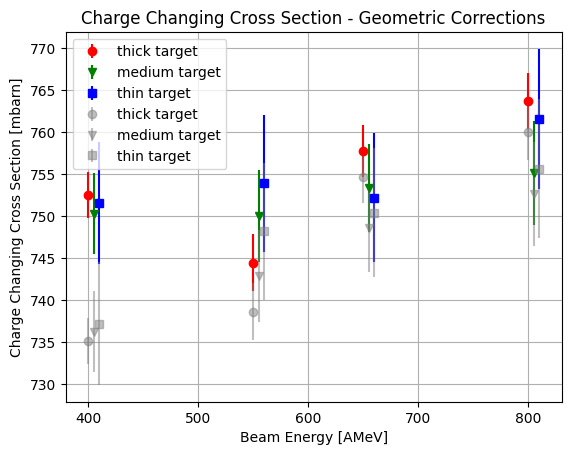

In [6]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,cc_cs_geo_thick,yerr=cc_geo_error_thick,label="thick target",color='red',marker="o",fmt="o")

energy = [405,555,655,805]
ax.errorbar(energy,cc_cs_geo_medium,yerr=cc_geo_error_medium,label="medium target",color='green',marker="v",fmt="o")

energy = [410,560,660,810]
ax.errorbar(energy,cc_cs_geo_thin,yerr=cc_geo_error_thin,label="thin target",color='blue',marker="s",fmt="o")

## whithout geo correction , in gray
energy = [400,550,650,800]
ax.errorbar(energy,cc_cs_geo_thick_f,yerr=cc_geo_error_thick_f,label="thick target",color='gray',marker="o",fmt="o",alpha=0.5)

energy = [405,555,655,805]
ax.errorbar(energy,cc_cs_geo_medium_f,yerr=cc_geo_error_medium_f,label="medium target",color='gray',marker="v",fmt="o",alpha=0.5)

energy = [410,560,660,810]
ax.errorbar(energy,cc_cs_geo_thin_f,yerr=cc_geo_error_thin_f,label="thin target",color='gray',marker="s",fmt="o",alpha=0.5)

ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Charge Changing Cross Section [mbarn]")
ax.set_title("Charge Changing Cross Section - Geometric Corrections")
#ax.set_ylim(740,890)
plt.savefig("charge_changing_cross_sec_geo_cut_corr.png")